In [1]:
# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

# Pretty Display of Variables
If you want to set this behaviour for all instances of Jupyter (Notebook and Console),  
simply create a file ~/.ipython/profile_default/ipython_config.py with the lines below.
```
c = get_config()

# Run all nodes interactively
c.InteractiveShell.ast_node_interactivity = "all"
```

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print ([1,2,3,4,5])
print ([6,7,8,9,10])

[1, 2, 3, 4, 5]
[6, 7, 8, 9, 10]


# Easy links to documentation
```
?int()
```

# Plotting in notebooks
``` test.py
%matplotlib inline
```
``` test.py
provides interactivity but can be a little slow, since rendering is done server-side.
%matplotlib notebook
```

# IPython Magic Commands
This will list all magic commands
``` test.py
%lsmagic
```

# IPython Magic - %env: Set Environment Variables
``` test.py
# Running %env without any arguments
# lists all environment variables

# The line below sets the environment
# variable OMP_NUM_THREADS
%env OMP_NUM_THREADS=4
```

# IPython Magic - %run: Execute python code
`%run` can execute python code from .py files - this is well-documented behavior.  
Lesser known is the fact that it can also execute other jupyter notebooks, which can quite useful.  
Note that using `%run` is not the same as importing a python module.  
```
# this will execute and show the output from
# all code cells of the specified notebook
%run ./two-histograms.ipynb
```

# IPython Magic - %load: Insert the code from an external script
This will replace the contents of the cell with an external script. 
You can either use a file on your computer as a source, or alternatively a URL.

``` test.py
# Before Running
%load ./hello_world.py
```
``` test.py
# After Running
# %load ./hello_world.py
if __name__ == "__main__":
	print("Hello World!")
```

# IPython Magic - %store: Pass variables between notebooks.
The `%store` command lets you pass variables between two different notebooks.
``` test.py
data = 'this is the string I want to pass to different notebook'
%store data
del data # This has deleted the variable
```
Now, in a new notebook…
``` test.py
%store -r data
print(data)
```

# IPython Magic - %who: List all variables of global scope.
``` test.py
one = "for the money"
two = "for the show"
three = "to get ready now go cat go" 
%who str
```

# IPython Magic - Timing
`%%time` will give you information about a single run of the code in your cell.

In [16]:
%%time
import time
for _ in range(1000):
    time.sleep(0.01)# sleep for 0.01 seconds

CPU times: user 32.8 ms, sys: 32 ms, total: 64.8 ms
Wall time: 11.3 s


In [19]:
import numpy
%time numpy.random.normal(size=10)

CPU times: user 107 µs, sys: 91 µs, total: 198 µs
Wall time: 145 µs


array([-0.79398836, -0.04145734,  0.28644917, -1.10905096,  0.21252843,
        0.86743907,  2.44287806, -1.65402933,  0.91611268,  0.29013293])

# IPython Magic - %%writefile and %pycat: Export the contents of a cell/Show the contents of an external script

In [20]:
%%writefile pythoncode.py

import numpy
def append_if_not_exists(arr, x):
    if x not in arr:
        arr.append(x)
        
def some_useless_slow_function():
    arr = list()
    for i in range(10000):
        x = numpy.random.randint(0, 10000)
        append_if_not_exists(arr, x)


Writing pythoncode.py


In [22]:
%pycat pythoncode.py

```
import numpy
def append_if_not_exists(arr, x):
    if x not in arr:
        arr.append(x)
        
def some_useless_slow_function():
    arr = list()
    for i in range(10000):
        x = numpy.random.randint(0, 10000)
        append_if_not_exists(arr, x)
```

# IPython Magic - %prun: Show how much time your program spent in each function.
``` test.py
%prun some_useless_slow_function()
```

```
26324 function calls in 0.556 seconds

Ordered by: internal time

ncalls  tottime  percall  cumtime  percall filename:lineno(function)
10000    0.527    0.000    0.528    0.000 <ipython-input-46-b52343f1a2d5>:2(append_if_not_exists)
10000    0.022    0.000    0.022    0.000 {method 'randint' of 'mtrand.RandomState' objects}
    1    0.006    0.006    0.556    0.556 <ipython-input-46-b52343f1a2d5>:6(some_useless_slow_function)
 6320    0.001    0.000    0.001    0.000 {method 'append' of 'list' objects}
    1    0.000    0.000    0.556    0.556 <string>:1(<module>)
    1    0.000    0.000    0.556    0.556 {built-in method exec}
    1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

# IPython Magic - Debugging with %pdb
``` test.py
%pdb

def pick_and_take():
    picked = numpy.random.randint(0, 1000)
    raise NotImplementedError()
    
pick_and_take()
```

# Suppress the output of a final function.

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy
x = numpy.linspace(0, 1, 1000)**1.5

/Users/wy/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(array([ 216.,  126.,  106.,   95.,   87.,   81.,   77.,   73.,   71.,   68.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

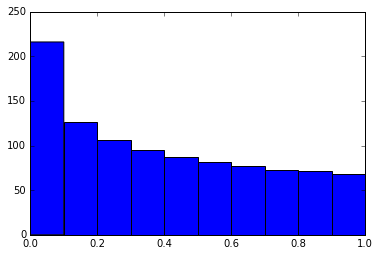

In [27]:
# Here you get the output of the function
plt.hist(x)

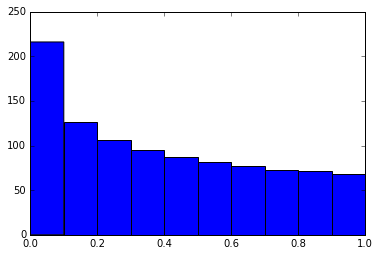

In [28]:
# By adding a semicolon at the end, the output is suppressed.
plt.hist(x);

# Executing Shell Commands
` !ls *.csv `

```
nba_2016.csv             titanic.csv
pixar_movies.csv         whitehouse_employees.csv
```

```
!pip install numpy
!pip list | grep pandas
```

```
Requirement already satisfied (use --upgrade to upgrade): numpy in /Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages
pandas (0.18.1)
```

# Using LaTeX for forumlas

`$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$`

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

# Run code from a different kernel in a notebook
1. %%bash
2. %%HTML
3. %%python2
4. %%python3
5. %%ruby
6. %%perl

In [31]:
%%bash
for i in {1..5}
do
   echo "i is $i"
done

i is 1
i is 2
i is 3
i is 4
i is 5


# Install other kernels for Jupyter
If you used Anaconda to set up your environment, getting R working is extremely easy.  
Just run the below in your terminal:
```
conda install -c r r-essentials
```

# Jupyter-contrib extensions
[!Jupyter-contrib extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) is a family of extensions which give Jupyter a lot more functionality

# Create a presentation from a Jupyter notebook.
Damian Avila’s [!RISE](https://github.com/damianavila/RISE) allows you to create a powerpoint style presentation from an existing notebook.

You can install RISE using conda:

# The Jupyter output system

```
import os
from IPython.display import display, Image
names = [f for f in os.listdir('../images/ml_demonstrations/') if f.endswith('.png')]
for name in names[:5]:
    display(Image('../images/ml_demonstrations/' + name, width=100))
```

```
names = !ls ../images/ml_demonstrations/*.png
names[:5]
['../images/ml_demonstrations/colah_embeddings.png',
 '../images/ml_demonstrations/convnetjs.png',
 '../images/ml_demonstrations/decision_tree.png',
 '../images/ml_demonstrations/decision_tree_in_course.png',
 '../images/ml_demonstrations/dream_mnist.png']
```

# ‘Big data’ analysis
1. [!ipyparallel (formerly ipython cluster)](https://github.com/ipython/ipyparallel) is a good option for simple map-reduce operations in python. We use it in rep to train many machine learning models in parallel
2. [!pyspark](https://www.cloudera.com/documentation/enterprise/5-5-x/topics/spark_ipython.html)
3. [!spark-sql magic %%sql](https://github.com/jupyter-incubator/sparkmagic)

# Sharing notebooks
# What are your favorites?
1. IPython built-in magics
2. Nice interactive presentation about jupyter by Ben Zaitlen
3. Advanced notebooks part 1: magics and part 2: widgets
4. Profiling in python with jupyter
5. 4 ways to extend notebooks
6. IPython notebook tricks
7. Jupyter vs Zeppelin for big data
8. Making publication ready Python notebooks.

[!jupyter-notebook-tips-tricks-shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)